##Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Loading the Dataset

In [2]:
raw_train_df = pd.read_csv("/content/train_MpHjUjU.csv")
raw_test_df = pd.read_csv("/content/test_hXY9mYw.csv")


##Bird's Eye View over Dataset

In [3]:
raw_train_df.shape,raw_test_df.shape

((19104, 13), (741, 1))

In [4]:
raw_train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [5]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [6]:
raw_train_df.nunique()

MMM-YY                     24
Emp_ID                   2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Salary                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Designation                 5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

###Abstract Inference

- we have in total 19014 records over the period of two financial year 2016-17.
- In total there are 2381 unique emp id
- Education level is categorized in 3 category
- Employee belongs to 29 different city
- 5 different Office hierarchy level
- Rating range is 4 

##Statistical Overview

In [7]:
raw_train_df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


##Visual Statistical Analysis over Data

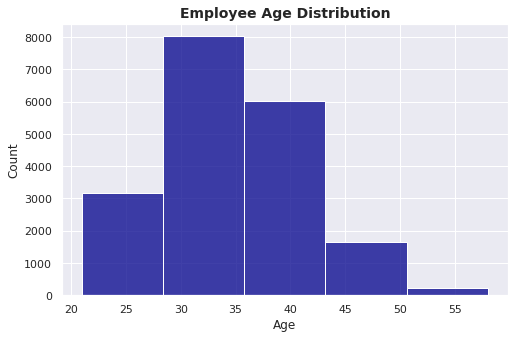

In [8]:
# AGE
plt.figure(figsize=(8,5))
sns.histplot(x='Age', data=raw_train_df,bins=5,color='darkblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Employee Age Distribution",fontsize=14, fontweight='bold')
plt.show()

- Max employee are of the age group 30-40, least are from 50 onwards

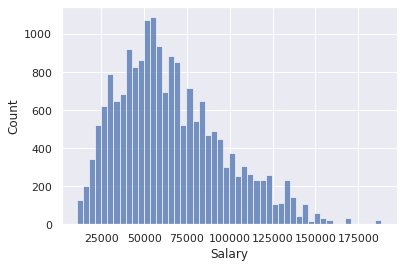

In [9]:
#Salary
sns.histplot(x='Salary',data=raw_train_df,bins=50)
plt.show()

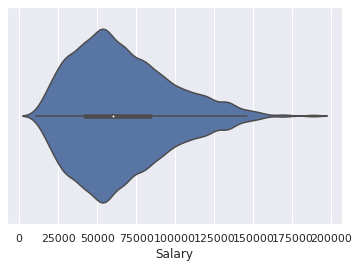

In [10]:
sns.violinplot(x='Salary', data=raw_train_df)
plt.show()

- Max employee are in the salary range between 40K-70K, where Company salary scale is between 10 k to 188 K.
- Further analysis can put more light on such diversification of salary distribution.

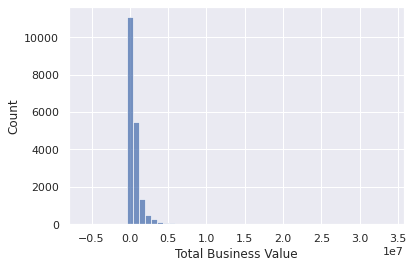

In [53]:
sns.histplot(x='Total Business Value',data=raw_train_df,bins=50)
plt.show()

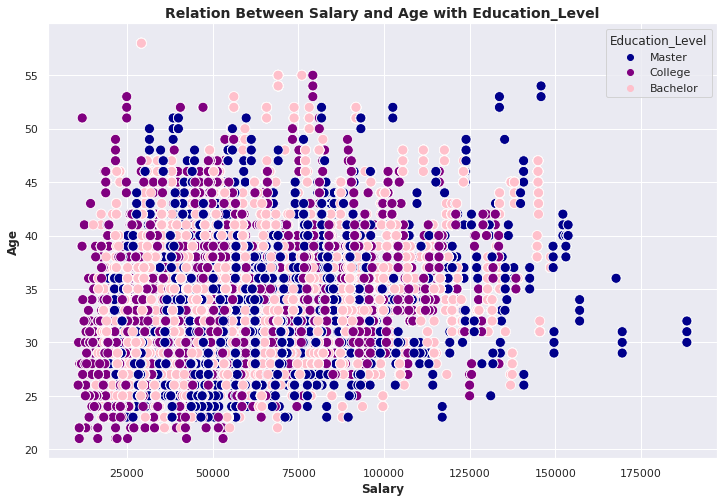

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot( x='Salary',
                y='Age',
                data= raw_train_df,
                hue = raw_train_df['Education_Level'], 
                palette=['darkblue','purple','pink'],
                s= 100)
plt.title("Relation Between Salary and Age with Education_Level", fontsize = 14, weight ='bold')
plt.xlabel("Salary", weight = 'bold')
plt.ylabel("Age", weight='bold')
plt.show()

- With above graph, it can be inferr that, age has nothing to do with the heigher salary package, and so does the Education level. Interesting
Definetly there are few with heigher degree who are reciving the heighest package, but others who are close by are with lower qualification.
- We can further check the Salary distribution based on designation. It might helps us to understand the distribution better.

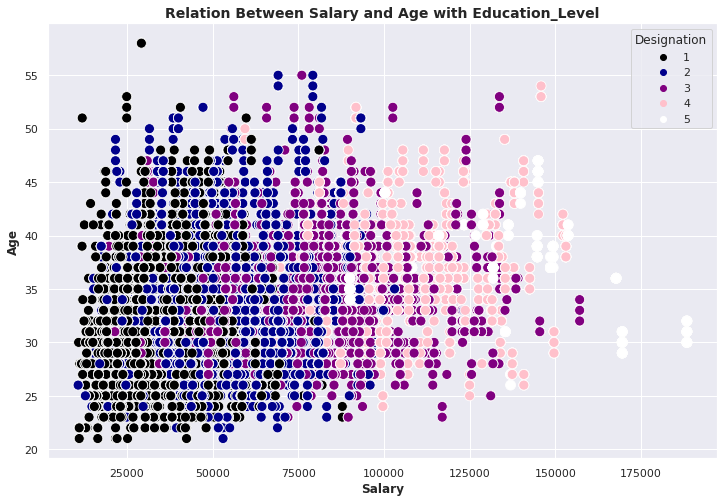

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot( x='Salary',
                y='Age',
                data= raw_train_df,
                hue = raw_train_df['Designation'], 
                palette=['black','darkblue','purple','pink','white'],
                s= 100)
plt.title("Relation Between Salary and Age with Education_Level", fontsize = 14, weight ='bold')
plt.xlabel("Salary", weight = 'bold')
plt.ylabel("Age", weight='bold')
plt.show()

- Age between 29-33 and master degree tends to grabs heigher tier and maximum salary. Interesting to know Organization belives in young managers.
- Also Salary is definetly based on Designation, with fewere outliers in both ends of salary range for every designation.

In [13]:
corr = raw_train_df.corr()

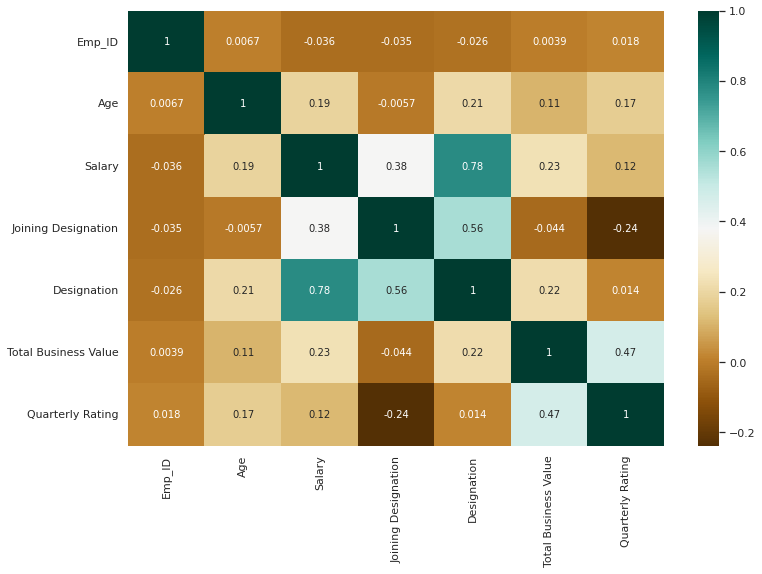

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap= 'BrBG',annot= True)
plt.show()

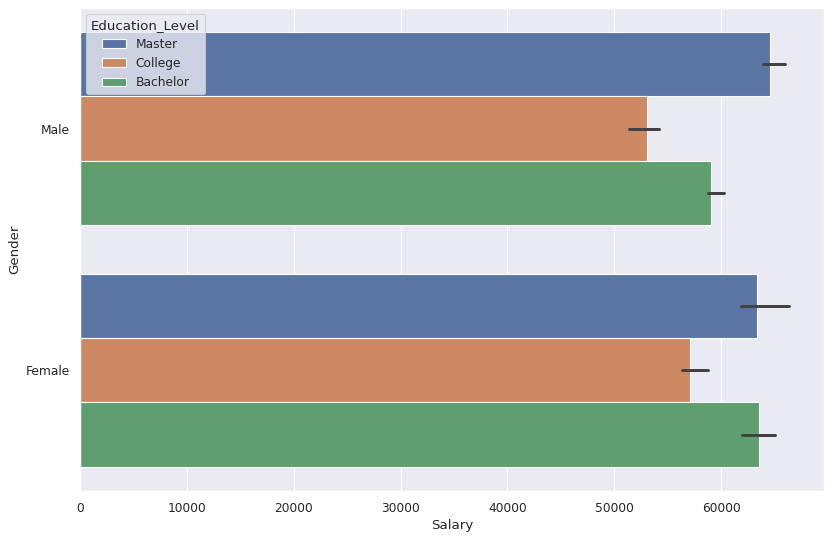

In [17]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Salary', y='Gender', hue='Education_Level', data = raw_train_df, estimator= np.median )
plt.show()

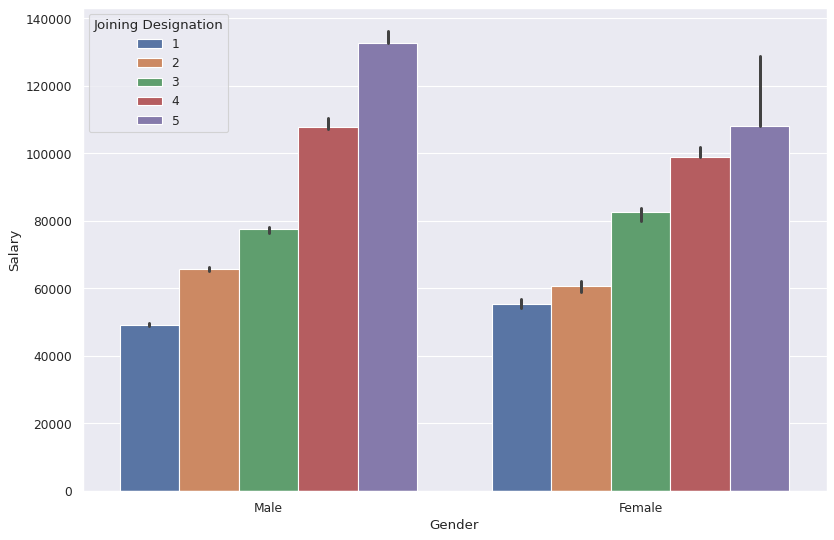

In [19]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Gender', y='Salary', hue='Joining Designation', data = raw_train_df, estimator= np.median )
plt.show()

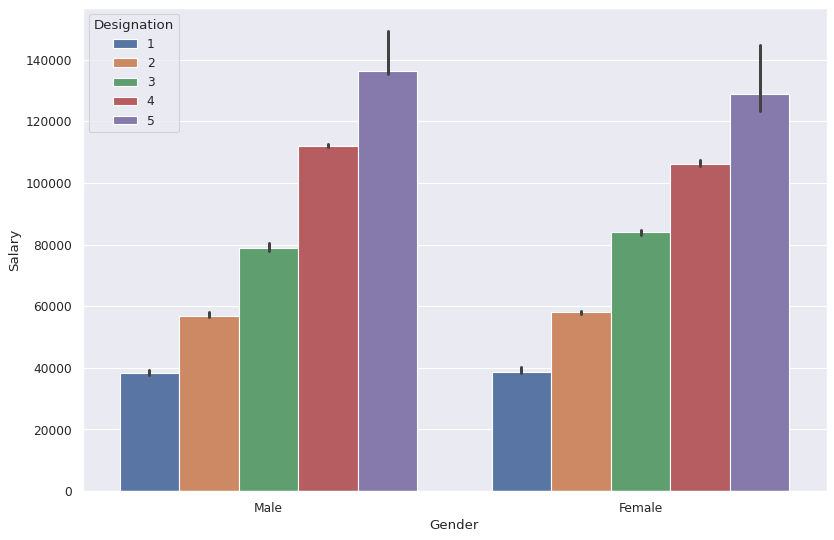

In [18]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Gender', y='Salary', hue='Designation', data = raw_train_df, estimator= np.median )
plt.show()

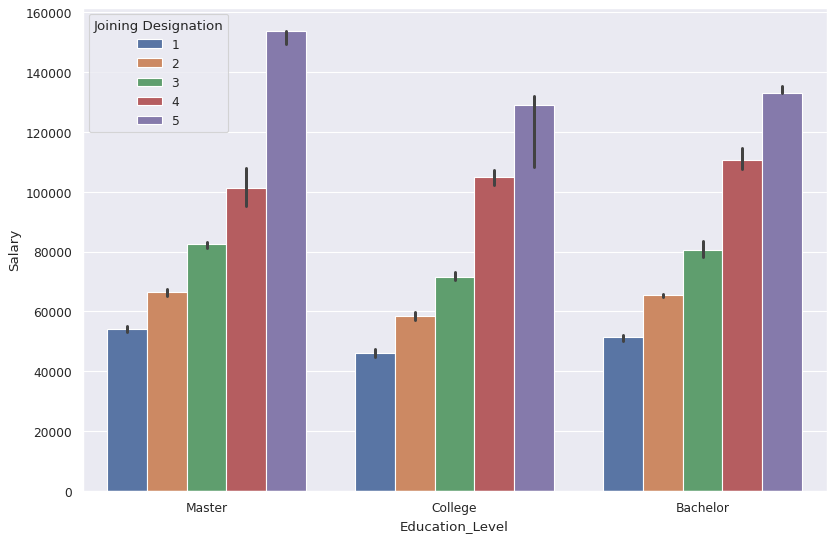

In [20]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Education_Level', y='Salary', hue='Joining Designation', data = raw_train_df, estimator= np.median )
plt.show()

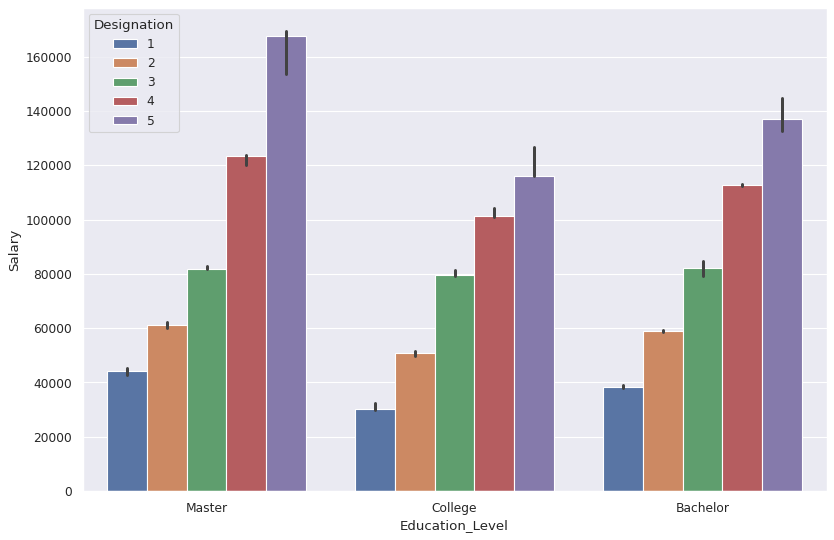

In [21]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Education_Level', y='Salary', hue='Designation', data = raw_train_df, estimator= np.median )
plt.show()

###Inference
- There is cleare picture that there is an Increment of salary for Employee falling the designation category of 4 and 5.
- For Designation 3 its almost constant
- Interesting to see there is a decrease in salary range of Designation group 1 and 2.
- For Female employee of Group 4 and 5 there is drastic increase in the salary over the period of time compare to Male employee.
- Group 1 employee irrespective of Gender sufferes loss in salary, over the period of time.
- Is it the main reason of attrition?
- Need to check which group people tends to leave the company more?

##Feature Engineering

In [22]:
raw_train_df['Attrition'] = raw_train_df['LastWorkingDate'] 

- O for Emp who are still with Organization
- 1 for the Emp who have left the Organization

In [24]:
raw_train_df.loc[raw_train_df['Attrition'].notnull(), 'Attrition'] = 1
raw_train_df['Attrition'].fillna(0, inplace=True)

##Analysis wrt to Attrition

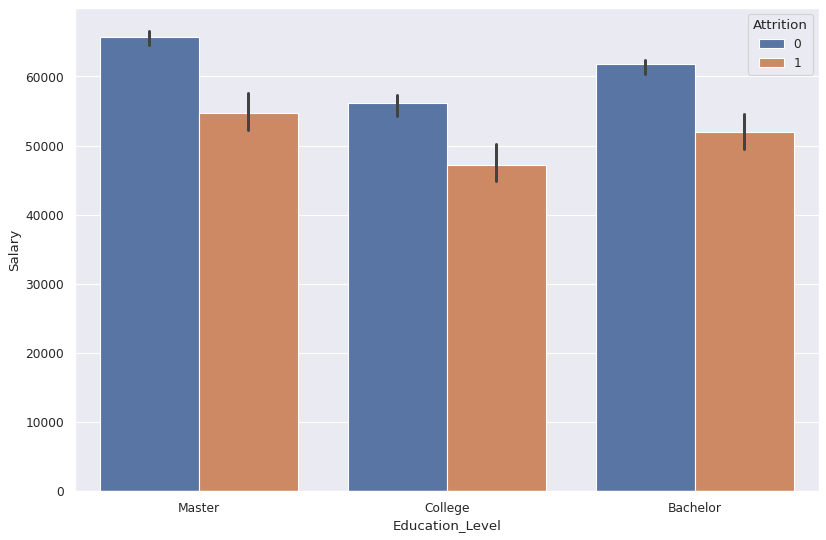

In [25]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Education_Level', y='Salary', hue='Attrition', data = raw_train_df, estimator= np.median )
plt.show()

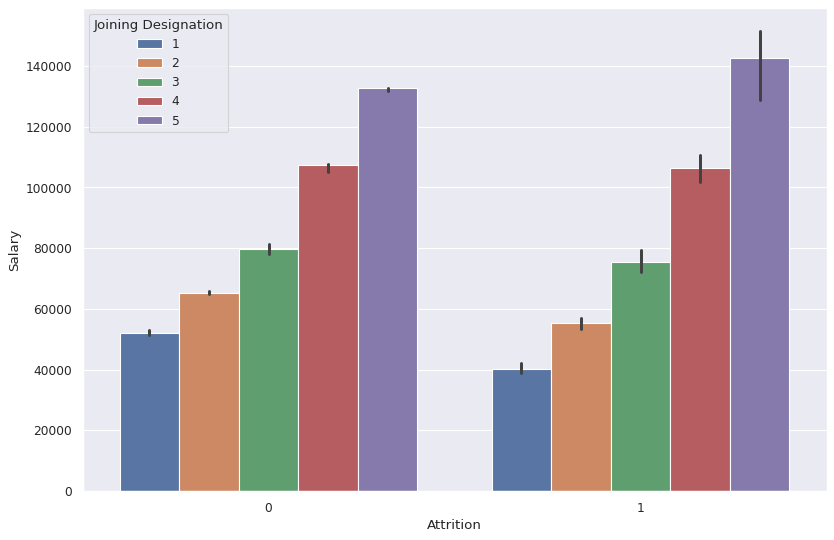

In [28]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Attrition', y='Salary', hue='Joining Designation', data = raw_train_df, estimator= np.median )
plt.show()

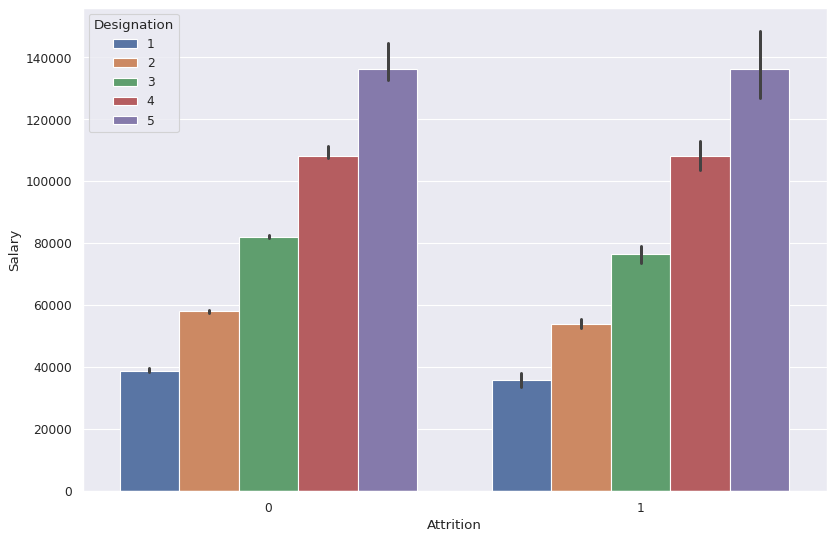

In [27]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="Drive Mode"
sns.barplot(x='Attrition', y='Salary', hue='Designation', data = raw_train_df, estimator= np.median )
plt.show()

##Cross Table Analysis

In [51]:
table = pd.pivot_table(raw_train_df,index=['Education_Level'],columns=['Attrition','Joining Designation'],values=['Gender'],aggfunc='count')
table

Gender                                         
Attrition                0                        1                
Joining Designation      1     2    3    4   5    1    2   3   4  5
Education_Level                                                    
Bachelor              3318  1928  961   95  35  241  183  94   6  3
College               2779  1724  694  120  54  240  203  87  11  1
Master                2982  1743  918  104  33  271  174  93   5  4

###Attrition Ratio wrt Joining Designation
- bachelor----    7% 9% 10% 6% 8%
- college ----    8% 11% 12% 9% 2%
- masters ----    9% 10% 10% 5% 12%

In [52]:
table = pd.pivot_table(raw_train_df,index=['Education_Level'],columns=['Attrition','Designation'],values=['Gender'],aggfunc='count')
table

Gender                                            
Attrition            0                          1                 
Designation          1     2     3    4    5    1    2    3   4  5
Education_Level                                                   
Bachelor          1609  2222  1676  713  117  195  188  114  26  4
College           1403  1728  1387  775   78  186  212  115  26  3
Master            1594  2077  1426  586   97  215  200  108  18  6

### Attrition Ratio wrt Designation

- **bachelors----**  12%    8%    6%    3%    3%
- **college -----**  13%    12%   8%    3%    3%
- **master ------**  13%    10%   8%    3%    6%

## Inference Based on Analysis

## Alarming
- Attrition ratio is more for during initials days for Designation group 2 & 3 for both College & Master level.
- Attrition ratio is more after period of time(after promotion or experience) for group 1 & 2 for college and master, whereas group 1 for bachelors.


- Raise in salary for Female Employee working in designation level 4 and 5 is outstanding with respect to Male employee and experience.
- Decrease in salary irrespective of gender in designation level 1 & 2, with respect to experience.

- Master level  on lower level after gaining experience  tends to leave the company on heigher rate. Same pattern found in College and Bachelors.
- Master level joining on heigher tier 5 and lower tier 1, 2 3, has alarming Attrition ratio.